# Visualizar datos del Titanic


## Determinar la cantidad de sobrevivientes dependiendo el género y la edad

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/train.csv', sep=',')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

### Filtrar Dataframe

Considerar las siguientes columnas para análisis: Name, Survived, Sex, Age

In [7]:
titanic_df=df[['Name', 'Survived', 'Sex', 'Age']]

In [8]:
titanic_df.isnull().sum()

Name          0
Survived      0
Sex           0
Age         177
dtype: int64

In [9]:
titanic_df.duplicated().sum()

0

### Analizar sobrevivientes

Cantidad de sobrevivientes totales

In [10]:
survivors_df = titanic_df[titanic_df['Survived']==1]
deceased_df = titanic_df[titanic_df['Survived']==0]
print('Sobrevivieron',survivors_df.shape[0], 'personas')

Sobrevivieron 342 personas


In [11]:
titanic_df.groupby(['Survived','Sex'])['Name'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Name, dtype: int64

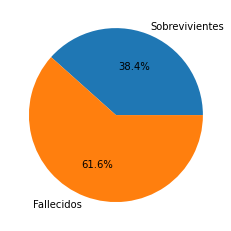

In [12]:
#Graficar
labels= 'Sobrevivientes', 'Fallecidos'
data = [survivors_df.shape[0], deceased_df.shape[0]]
plt.pie(data, autopct='%1.1f%%', labels=labels)
plt.show()

<AxesSubplot:xlabel='Sexo', ylabel='Cantidad'>

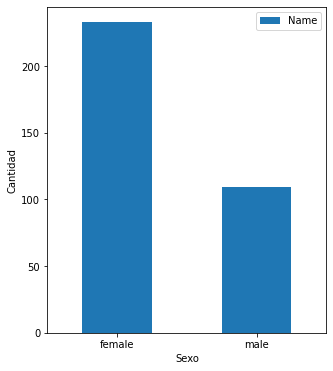

In [13]:
survivors_df.groupby(['Sex'])['Name'].count().plot.bar(y='Name', rot=0, xlabel='Sexo', ylabel='Cantidad', legend=True, figsize=(5,6))

In [14]:
survivors_df.columns
survivors_df.columns.str.strip()
# Pasar la misma informacion pero usando un diccionario 
survivors_groupSexName = survivors_df.groupby(['Sex'])['Name'].count()
survivors_dic = survivors_groupSexName.to_dict()

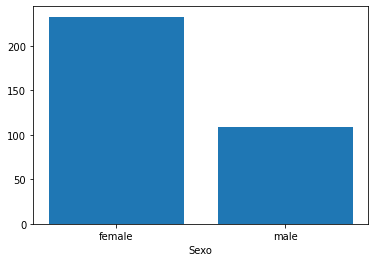

In [15]:
plt.bar(survivors_dic.keys(), survivors_dic.values())
plt.xlabel('Sexo')
plt.show()

### Agrupar sobrevivientes en rangos etarios

In [16]:
#Ver edades nulas de los sobrevivientes
survivors_df.isnull().sum()


Name         0
Survived     0
Sex          0
Age         52
dtype: int64

In [17]:
# Eliminar valores nulos del campo edad
survivors_df = survivors_df[survivors_df['Age'].notna()]
survivors_df.isnull().sum()

Name        0
Survived    0
Sex         0
Age         0
dtype: int64

In [18]:
# Grupos de Edades = 0-5, 6-12, 13-18, 19-35, 36-60, 60-100
bins = [0, 5, 12, 18, 35, 60, 100]
names = [1, 2, 3, 4, 5, 6]

survivors_df['Age'] = pd.cut(survivors_df['Age'], bins, labels = names)
survivors_df.head()

,Name,Survived,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,5
2,"Heikkinen, Miss. Laina",1,female,4
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,4
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,female,4
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,female,3


In [19]:
survivors_groupAgeName = survivors_df.groupby(['Age'])['Name'].count()
survivors_dic = survivors_groupAgeName.to_dict()
survivors_dic

{1: 31, 2: 9, 3: 30, 4: 137, 5: 78, 6: 5}

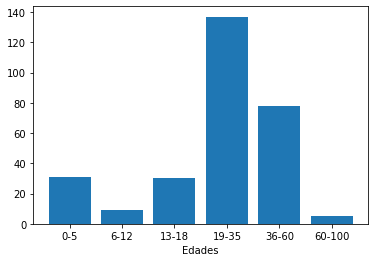

In [20]:
plt.bar(survivors_dic.keys(), survivors_dic.values())
plt.xlabel('Edades')
plt.xticks([1, 2, 3, 4, 5, 6], ['0-5', '6-12', '13-18', '19-35', '36-60', '60-100' ],fontsize=10) 
plt.savefig('../output/edad_sobrevivientes.png')
plt.show()

In [22]:
survivors_df.to_excel('../output/output.xlsx')